### 2. Machine Learning for Regression

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2 Data Preparation
The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [3]:
!wget $data

--2025-10-04 17:21:23--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.2’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.006s  

2025-10-04 17:21:24 (133 MB/s) - ‘car_fuel_efficiency.csv.2’ saved [874188/874188]



In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
## standardize the column names to lower and _ to separate blank spaces
df.columns = df.columns.str.lower().str.replace(' ','_')
print(df.columns)

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')


In [6]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [7]:
# to name the columns with object values
strings = list(df.loc[:,df.dtypes == 'object'].columns)
strings

['origin', 'fuel_type', 'drivetrain']

In [8]:
# to standardize the values
for col in strings:
    df[col] = df[col].str.lower().str.replace(r'[ \-]','_',regex=True)
print(df.head())

   engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                  170            3.0       159.0     3413.433759   
1                  130            5.0        97.0     3149.664934   
2                  170            NaN        78.0     3079.038997   
3                  220            4.0         NaN     2542.392402   
4                  210            1.0       140.0     3460.870990   

   acceleration  model_year  origin fuel_type         drivetrain  num_doors  \
0          17.7        2003  europe  gasoline    all_wheel_drive        0.0   
1          17.8        2007     usa  gasoline  front_wheel_drive        0.0   
2          15.1        2018  europe  gasoline  front_wheel_drive        0.0   
3          20.2        2009     usa    diesel    all_wheel_drive        2.0   
4          14.4        2009  europe  gasoline    all_wheel_drive        2.0   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3         

In [9]:
# to check how many values in each columns with object dtype
for col in strings:
    print(col)
    print(df[col].unique())
    print(df[col].nunique())
    

origin
['europe' 'usa' 'asia']
3
fuel_type
['gasoline' 'diesel']
2
drivetrain
['all_wheel_drive' 'front_wheel_drive']
2


### Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

### 2.3 Exploratory Data Analysis

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail?

In [10]:
### Visualize the data by plotting histogram
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
df_selected = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]
df_selected.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

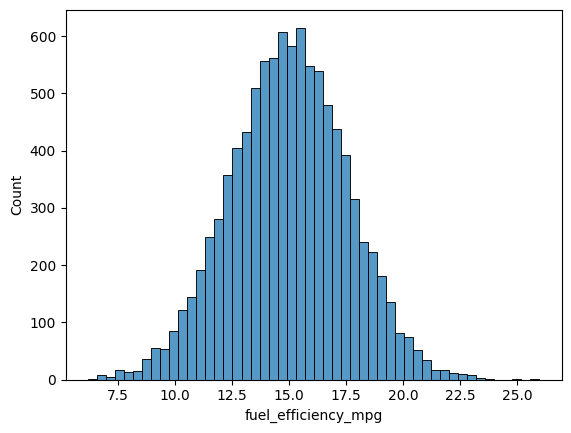

In [12]:
sns.histplot(df_selected.fuel_efficiency_mpg, bins=50)

### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`


In [13]:
# to find the column with missing values: horsepower, etc.
df_selected.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### 2.4 Setting up the validation framework

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [14]:
n = len(df_selected)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(n, n_val, n_test, n_train)

9704 1940 1940 5824


In [15]:
# train test val split
df_val = df_selected.iloc[:n_val]
df_test = df_selected.iloc[n_val:n_val+n_test]
df_train = df_selected.iloc[n_val+n_test:]

In [16]:
np.arange(n)

array([   0,    1,    2, ..., 9701, 9702, 9703], shape=(9704,))

In [17]:
# set an array of index
idx = np.arange(n)

# set seed to 42
np.random.seed(42)

# shuffle the index and split your data in train/val/test sets
np.random.shuffle(idx)

df_val = df_selected.iloc[idx[:n_val]]
df_test = df_selected.iloc[idx[n_val:n_val+n_test]]
df_train = df_selected.iloc[idx[n_val+n_test:]]


In [18]:
print(len(df_val),len(df_test),len(df_train))

1940 1940 5824


In [19]:
# checking index of the split dataset
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
8064,70,87.0,3346.134219,2004,13.085351
6622,280,147.0,4193.817815,2017,9.385060
2155,240,137.0,2471.172629,2010,17.697460
8916,240,127.0,4044.606636,2000,9.298735
3274,280,NaN,3039.297482,2011,14.724394


In [20]:
# reset the index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
# split the target y: fuel_efficiency_mpg
y_train = df_train.fuel_efficiency_mpg
y_val = df_val.fuel_efficiency_mpg
y_test = df_test.fuel_efficiency_mpg

# drop the target from X
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199

In [22]:
df_selected.horsepower.quantile(0.5)

np.float64(149.0)

### 2.5 Linear Regression
### 2.6 Linear Regression: Vector Form
$g(x_i) = w_0 + \sum^{n}_{j=1}w_j \cdot x_{ij}$

In [23]:
def dot(xi,w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res = res + xi[j]*w[j]
    return res

def linear_regression(xi,w):
    w_new = [w0] + w
    xi = [1] + xi
    return dot(xi, w_new)

### 2.7 Training a Linear Regression Model

$$ X^T Xw = X^T y$$
$$ w = \left( X^{T} X \right)^{-1} X^{T} y $$


In [24]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])  # X = [1 X1 X2 ...]

    XTX = X.T.dot(X) 
    XTX_inv = np.linalg.inv(XTX)
    XTy = X.T.dot(y)
    w_full = XTX_inv.dot(XTy)

    return w_full[0], w_full[1:]
    

### 2.8 Building a Baseline Model 
- Extracting basic features for linear regression model
- Replacing missing values with zeroes, mean etc. for training
- Training data predictions plotted for comparison.


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

1. With 0
2. With mean
3. Both are equally good


In [25]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [26]:
df_train[base].values

array([[  70.        ,   87.        , 3346.1342185 , 2004.        ],
       [ 280.        ,  147.        , 4193.81781457, 2017.        ],
       [ 240.        ,  137.        , 2471.17262896, 2010.        ],
       ...,
       [ 290.        ,  187.        , 2440.50803916, 2019.        ],
       [ 260.        ,  129.        , 1865.40447951, 2019.        ],
       [ 270.        ,  147.        , 2611.9394998 , 2017.        ]],
      shape=(5824, 4))

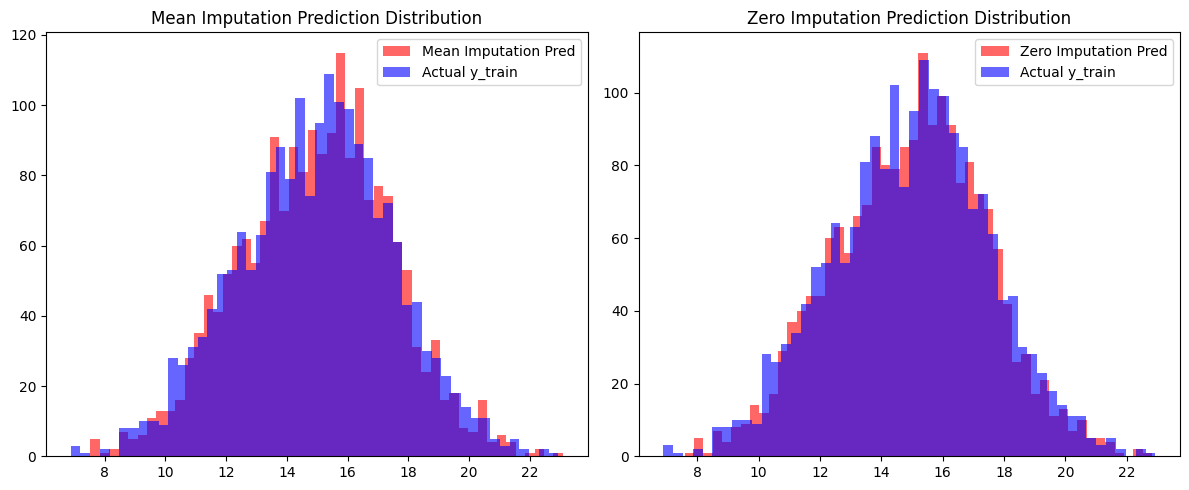

In [27]:
# impute missing values with mean
X_train_mean = df_train[base].fillna(df_train[base].mean()).values
X_val_mean = df_val[base].fillna(df_val[base].mean()).values

# impute missing values with zero
X_train_zero = df_train[base].fillna(0).values
X_val_zero = df_val[base].fillna(0).values

# train the model with train data
w0_mean, w_mean = train_linear_regression(X_train_mean,y_train)
w0_zero, w_zero = train_linear_regression(X_train_zero,y_train)

# compute y_pred for both
y1_pred = w0_mean + X_val_mean.dot(w_mean)
y2_pred = w0_zero + X_val_zero.dot(w_zero)

# plot two subplots side by side

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # row 1, column 2, count 1
plt.hist(y1_pred, color='red', bins=50, alpha=0.6, label='Mean Imputation Pred')
plt.hist(y_val, color='blue', bins=50, alpha=0.6, label='Actual y_train')
plt.title('Mean Imputation Prediction Distribution')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(y2_pred, color='red', bins=50, alpha=0.6, label='Zero Imputation Pred')
plt.hist(y_val, color='blue', bins=50, alpha=0.6, label='Actual y_train')
plt.title('Zero Imputation Prediction Distribution')
plt.legend()

# space between the plots
plt.tight_layout()
# show plot
plt.show()

### 2.9 RMSE
$$ RMSE = \sqrt{\frac{1}{m} * \sum^{m}_{i=1}(g(x_i)-y_i)^2} $$

In [28]:
def rmse(y,y_pred):
    error = y - y_pred
    se = error**2
    mse = se.mean()
    return np.sqrt(mse)


### 2.10 Validating the model

In [29]:
print(f"RMSE for mean imputation:",round(rmse(y_val,y1_pred),2))
print(f"RMSE for zero imputation:",round(rmse(y_val,y2_pred),2))

RMSE for mean imputation: 0.47
RMSE for zero imputation: 0.53


### 2.13 Regularization
$$ w = (X^TX + rI)^{-1} X^Ty$$, where r is the regularization parameter (hyperparameter).

In [30]:
def train_linear_regression_reg(X,y,r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0]) #  prevent overfitting (regularization) and ensuring invertibility
    XTX_inv = np.linalg.inv(XTX)
    XTy = X.T.dot(y)
    w_full = XTX_inv.dot(XTy)

    return w_full[0], w_full[1:]


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100


In [31]:
# checking across different regularization parameters r
reg = [0, 0.01, 0.1, 1, 5, 10, 100]
r_arr = {}
for r_i in reg:
    # Train the Ridge model on train set using the current r_i
    w0, w = train_linear_regression_reg(X_train_zero,y_train,r=r_i)
    # Predict on the validation set
    y_pred = w0 + X_val_zero.dot(w)
    # Store the RMSE score for each r
    r_arr[r_i] = round(rmse(y_val,y_pred),4)
    
best_r = min(r_arr,key=r_arr.get)
print(f"The best regularization parameter (r) is: {best_r}")

The best regularization parameter (r) is: 0


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.



In [32]:
# Define the seeds and the list to store scores
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for s in seeds:
    # set an array of index
    idx = np.arange(len(df_selected))
    
    # set seed to s
    np.random.seed(s)

    # 1. shuffle the index and split your data in train/val/test sets
    np.random.shuffle(idx)
    
    df_val = df_selected.iloc[idx[:n_val]]
    df_test = df_selected.iloc[idx[n_val:n_val+n_test]]
    df_train = df_selected.iloc[idx[n_val+n_test:]]

    # 2. Split the data in X-y
    # split the target y: fuel_efficiency_mpg
    y_train = df_train.fuel_efficiency_mpg
    y_val = df_val.fuel_efficiency_mpg
    y_test = df_test.fuel_efficiency_mpg
    
    # drop the target from X
    X_train = df_train.drop('fuel_efficiency_mpg', axis=1)
    X_val = df_val.drop('fuel_efficiency_mpg', axis=1)
    X_test = df_test.drop('fuel_efficiency_mpg', axis=1)
    
    # 3. Impute Missing Values with 0
    X_train_zero = X_train[base].fillna(0).values
    X_val_zero = X_val[base].fillna(0).values

    # 4. Train Model (No regularization, r=0)
    w0, w = train_linear_regression_reg(X_train_zero, y_train,r=0)

    # 5. Predict on Validation Set
    y_pred = w0 + X_val_zero.dot(w)

    # 6. Calculate and Collect RMSE
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

# The standard deviation of the collected RMSE scores
std_dev = np.std(rmse_scores)

# 7. Round the result
final_std_dev = round(std_dev, 3)

print(f"Individual RMSE Scores: {rmse_scores}")
print(f"Standard Deviation of Scores: {final_std_dev}")


Individual RMSE Scores: [np.float64(0.517977832303543), np.float64(0.5133991852630773), np.float64(0.5221561286171921), np.float64(0.508468745158658), np.float64(0.5145319893064505), np.float64(0.49933517325225074), np.float64(0.5142923296975087), np.float64(0.5214820362158356), np.float64(0.5293573785239898), np.float64(0.5210801439874219)]
Standard Deviation of Scores: 0.008



### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5

In [33]:
# Define the seeds and the list to store scores
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

# --- ITERATE THROUGH SEEDS ---
for s in seeds:
    # set an array of index
    idx = np.arange(len(df_selected))
    
    # set seed to s
    np.random.seed(s)

    # 1. shuffle the index and split your data in train/val/test sets
    np.random.shuffle(idx)
    
    # Combine train and validation datasets.
    df_train = df_selected.iloc[idx[:n_val+n_train]]
    df_test = df_selected.iloc[idx[n_val+n_train:]]

    # 2. Split the data in X-y
    # split the target y: fuel_efficiency_mpg
    y_train = df_train.fuel_efficiency_mpg
    y_test = df_test.fuel_efficiency_mpg
    
    # drop the target from X
    X_train = df_train.drop('fuel_efficiency_mpg', axis=1)
    X_test = df_test.drop('fuel_efficiency_mpg', axis=1)
    
    # 3. Impute Missing Values with 0
    X_train_zero = X_train[base].fillna(0).values
    X_test_zero = X_test[base].fillna(0).values

    # 4. Train Model (regularization, r=0.001)
    w0, w = train_linear_regression_reg(X_train_zero, y_train,r=0.001)

    # 5. Predict on Test Set
    y_pred = w0 + X_test_zero.dot(w)

    # 6. Calculate and Collect RMSE
    score = rmse(y_test, y_pred)
    rmse_scores.append(score)

print(f"Individual RMSE Score of seed 9: {round(rmse_scores[-1],3)}")

Individual RMSE Score of seed 9: 0.516
